# Análisis Factorial

In [1]:
# Importo librerías
import pandas as pd
from sklearn.datasets import load_iris
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer  
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.2/202.2 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 13.1 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=dc9b24d9b4bc4ad16f2eb2438f9e1349c13dc59d1e8585923150965e3b6e9f46
  Stored in directory: /root/.cache/pip/wheels/f5/8f/2e/a689c21bc4bf04f84ceebf4b1f5846cacc04bfe179e7ad5ab0
Successfully built factor_analyzer


In [2]:
# Cargo el dataset
df= pd.read_csv("bfi.csv") # https://osf.io/s87kd/

In [3]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


* A: Agradable
* E: Extraversión
* N: Neuroticismo
* C: Conciencia
* O: Open Mind

In [4]:
# Elimino columnas innecesarias
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [5]:
# Elimino filas con valores missings
df.dropna(inplace=True)
df[:2]

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0


Se realiza KMO el test de Kaiser-Meyer-Olkin (KMO) para ver cómo de indicados son los datos para realizar un análisis factorial. Posteriormente se ajustan los datos a un modelo de análisis factorial con 25 factores. 

In [6]:
# Realizo el test de Kaiser-Meyer-Olkin
# Indica cómo de adecuada es la muestra a hacer un análisis factorial
# Los valores entre 0.5 y 1 indican que es apropiado aplicarlo
kmo_all,kmo_model=calculate_kmo(df)
print('El valor KMO es: {}\n[0.5-1] -> Valores adecuados para análisis factorial'.format(round(kmo_model,2)))

El valor KMO es: 0.85
[0.5-1] -> Valores adecuados para análisis factorial


In [7]:
# Ajusto un modelo de análisis factorial a los datos
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)

FactorAnalyzer(n_factors=25, rotation=None, rotation_kwargs={})

In [8]:
# Criterio 1: Kaiser Criterion
# Compruebo los autovalores > 1
ev, v = fa.get_eigenvalues()
print('--- Criterio 1: Kaiser Criterion')
print(u'El número de factores adecuado según el criterio de Kaiser (autovalor>1) es {}'.format(sum(ev>1)))

--- Criterio 1: Kaiser Criterion
El número de factores adecuado según el criterio de Kaiser (autovalor>1) es 6



--- Criterio 2: gráfica de sedimentación


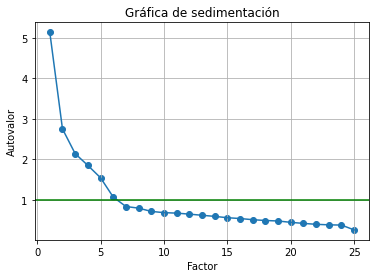

In [9]:
# Criterio 2: gráfica de sedimentación
# Compruebo un codo en la gráfica, punto en el que está el
# número de factores
print('\n--- Criterio 2: gráfica de sedimentación')
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title(u'Gráfica de sedimentación')
plt.xlabel('Factor')
plt.ylabel('Autovalor')
plt.axhline(1, c="green")
plt.grid()
plt.show()

Llegados a este punto, se genera un análisis factorial con el número de factores calculados como el óptimo en el punto anterior, en la gráfica anterior 5, 6 y 7 parecen óptimos.

In [10]:
# Creo el análisis factorial con 6 factores y analizo los factores
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [11]:
columnas_factores = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6']
pd.DataFrame(fa.loadings_, index=df.columns, columns=columnas_factores)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


In [12]:
# Obtengo las varianzas de los factores
nombres_varianzas = ['Varianza del factor', 'Proporción de varianza', 'Varianza acumulada']
pd.DataFrame(fa.get_factor_variance(), columns=columnas_factores, index=nombres_varianzas)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
Varianza del factor,2.726989,2.602239,2.073471,1.713499,1.504831,0.630297
Proporción de varianza,0.109080,0.104090,0.082939,0.068540,0.060193,0.025212
Varianza acumulada,0.109080,0.213169,0.296108,0.364648,0.424841,0.450053
